<a href="https://colab.research.google.com/github/Zac-dev618/tinder-analytics/blob/main/notebooks/01_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# === IMPORTS ===
from pathlib import Path

import numpy as np
import pandas as pd

# Visualisation
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)

# Déséquilibre de classes
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline


Lecture du Dataset + encodage en 'latin-1' car de base en UTF-8 (donc problème de lecture) :

In [59]:
DATA_PATH = Path("/data/Dataset_Tinder.csv")
df = pd.read_csv(DATA_PATH, encoding="latin-1")

Connaitre le nombre de lignes et de colonnes du Dataset :

In [60]:
df.shape

(8378, 195)

Visualisation des 5 premières lignes et de l'ensemble des colonnes pour avoir un aperçu :

In [61]:
pd.set_option('display.max_columns', None)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

Visualisation de l'ensemble des noms de colonnes seulement :

In [62]:
print(df.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

Compter le nombre de personnes uniques grâce aux "iid" qui est l'identifiant unique :

In [63]:
nombre_personnes_uniques = df['iid'].nunique()

print(f"\nLe nombre de personnes uniques dans le dataset est : {nombre_personnes_uniques}")


Le nombre de personnes uniques dans le dataset est : 551


In [64]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [65]:
## --- VISUALISER L'AGE PAR GENRE CHEZ LES PARTICIPANTS UNIQUES. (bar chart)   ---


ID_COLUMN_NAME = 'iid'

df_unique_participants = df.drop_duplicates(subset=[ID_COLUMN_NAME]).copy()  # Création d'une copie indépendante en mémoire (pour modif ulterieur)

total_unique_participants_overall = len(df_unique_participants)
print(f"Total des participants uniques (iid) dans le jeu de données : {total_unique_participants_overall}")

df_unique_participants['gender_label'] = df_unique_participants['gender'].map({0: 'Femme', 1: 'Homme'})

df_clean_for_plotting = df_unique_participants.dropna(subset=['age', 'gender_label']).copy()

# Convertir l'âge en entier pour la visualisation, en tolérant les NaN
df_clean_for_plotting['age'] = pd.to_numeric(df_clean_for_plotting['age'], errors='coerce').astype('Int64')

# Vérification du nombre de participants restants pour le graphique
num_participants_in_plot = len(df_clean_for_plotting)
print(f"Nombre de participants uniques avec ÂGE et GENRE valides pour le graphique : {num_participants_in_plot}")
print(f"Différence (participants sans données complètes) : {total_unique_participants_overall - num_participants_in_plot}")

# ---Visualisation avec Plotly ---
min_age_for_plot = 18

palette_genre = {'Femme': "#e75480", 'Homme': "#1f77b4"}

fig_hist_group = px.histogram(df_clean_for_plotting,
                              x='age',
                              color='gender_label',
                              barmode='group',
                              title='Répartition de l\'âge par genre (Participants uniques avec données complètes)',
                              labels={'age': 'Tranche d\'âge', 'count': 'Nombre de participants'},
                              template='plotly_white',
                              nbins=20,
                              color_discrete_map=palette_genre)


if not df_clean_for_plotting.empty and 'age' in df_clean_for_plotting.columns:
    fig_hist_group.update_xaxes(range=[min_age_for_plot - 0.5, df_clean_for_plotting['age'].max() + 0.5])

fig_hist_group.update_layout(
    xaxis_title="Âge",
    yaxis_title="Nombre de participants uniques",
    legend_title_text='Genre'
)

fig_hist_group.show()

Total des participants uniques (iid) dans le jeu de données : 551
Nombre de participants uniques avec ÂGE et GENRE valides pour le graphique : 543
Différence (participants sans données complètes) : 8


* La participation des femmes est prédominante entre 20 et 25 ans, tandis que
celle des hommes devient majoritaire de 26 à 33 ans. Globalement, la tranche d'âge la plus fréquemment observée, tous sexes confondus, est de 22 à 29 ans.

,match,count,percentage
0,0,6998,83.528288
1,1,1380,16.471712


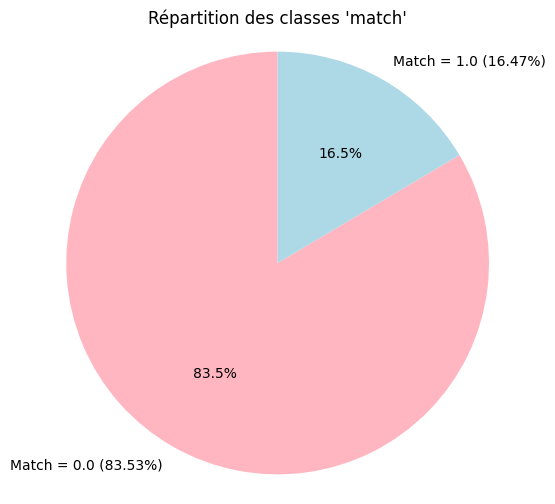

In [66]:
## ---------- NOMBRE TOTAL DE MATCH --------------

# Calcul des comptes pour chaque classe de 'match' et création d'un DataFrame avec le pourcentage
match_counts = df['match'].value_counts().rename_axis('match').reset_index(name='count')
match_counts['percentage'] = (match_counts['count'] / match_counts['count'].sum()) * 100

display(match_counts)

labels = [f"Match = {row['match']} ({row['percentage']:.2f}%)" for _, row in match_counts.iterrows()]

colors = ['#ffb6c1', '#add8e6']  # correspond à [match=0 rouge clair, match=1 vert clair]

plt.figure(figsize=(6,6))
plt.pie(
    match_counts['count'],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Répartition des classes 'match'")
plt.axis('equal')
plt.show()
plt.show()

* Le dataset contient 8 380 observations, dont 83,5 % de non-matches et seulement 16,5 % de matches,
 ce qui montre que la probabilité d’avoir un match est très faible

/tmp/ipython-input-27332204.py:48: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




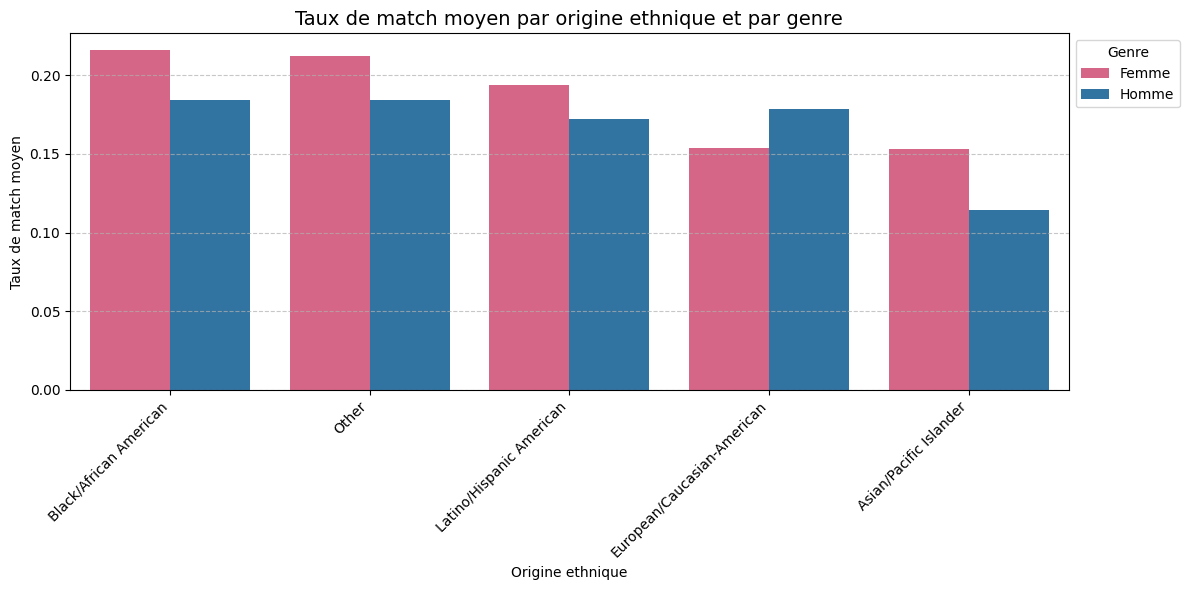

In [67]:
## ------  ÉTUDE COMPARATIVE DES TAUX DE MATCH MOYENS SELON L’ORIGINE ETHNIQUE ET LE GENRE   ---------


gender_labels = {0: 'Femme', 1: 'Homme'}

df['gender_label'] = df['gender'].map(gender_labels)

race_labels = {
    1: "Black/African American",
    2: "European/Caucasian-American",
    3: "Latino/Hispanic American",
    4: "Asian/Pacific Islander",
    5: "Native American",
    6: "Other"
}

palette_genre = {'Femme': "#e75480", 'Homme': "#1f77b4"}

race_grouped_initial = df[df['race'].isin(race_labels.keys())].copy()

race_grouped_initial['race_label'] = race_grouped_initial['race'].map(race_labels)


# -------------------- Agrégation --------------------
# Calcul de la moyenne de 'match' pour chaque combinaison (genre, race)
#  si 'match' est binaire, cela correspond à un taux moyen
race_grouped = (
    race_grouped_initial
    .groupby(['gender_label', 'race_label'], dropna=False)['match']
    .mean()
    .reset_index()
)

mean_match_by_race = (
    race_grouped_initial
    .groupby('race_label', dropna=False)['match']
    .mean()
    .reset_index()
)
order_races = (
    mean_match_by_race
    .sort_values(by='match', ascending=False)['race_label']
    .tolist()
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=race_grouped,
    x='race_label',
    y='match',
    hue='gender_label',
    palette=palette_genre,
    order=order_races,
    ci=None
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Taux de match moyen par origine ethnique et par genre", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Origine ethnique")
plt.ylabel("Taux de match moyen")

plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

* Les femmes ont un taux de match moyen légèrement plus élevé que les hommes,
avec de petites différences selon l’origine ethnique, sans écarts vraiment marqués, même si les Black/African American obtiennent un peu de meilleurs scores et les Asian/Pacific Islander un peu moins.

Moyenne des intérêts communs selon le match :


match,0,1
sports,6.400058,6.553114
tvsports,4.581050,4.547253
exercise,6.235650,6.297436
dining,7.757427,7.917949
museums,6.972166,7.054945
art,6.682867,6.875458
hiking,5.709547,5.876923
gaming,3.865446,3.961172
clubbing,5.684453,6.058608
reading,7.660513,7.769963


<Figure size 1200x600 with 0 Axes>

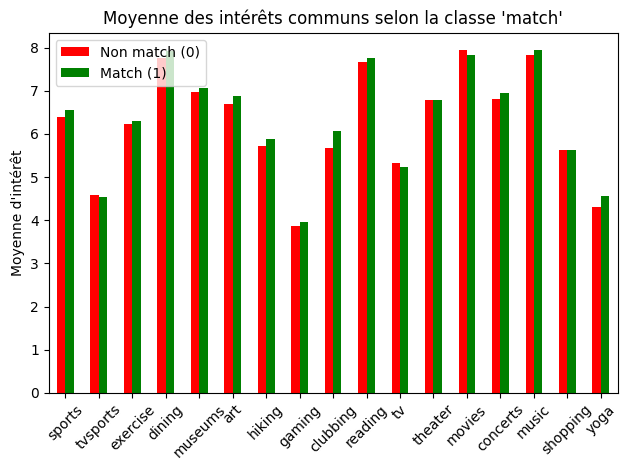


Corrélation des intérêts communs avec la variable 'match' :
movies     -0.022989
tv         -0.014542
tvsports   -0.004472
shopping   -0.001333
theater     0.000087
exercise    0.009470
gaming      0.013543
museums     0.014954
reading     0.020222
sports      0.021666
music       0.023093
hiking      0.024143
concerts    0.027034
art         0.031545
dining      0.033912
yoga        0.036601
clubbing    0.055435
Name: match, dtype: float64


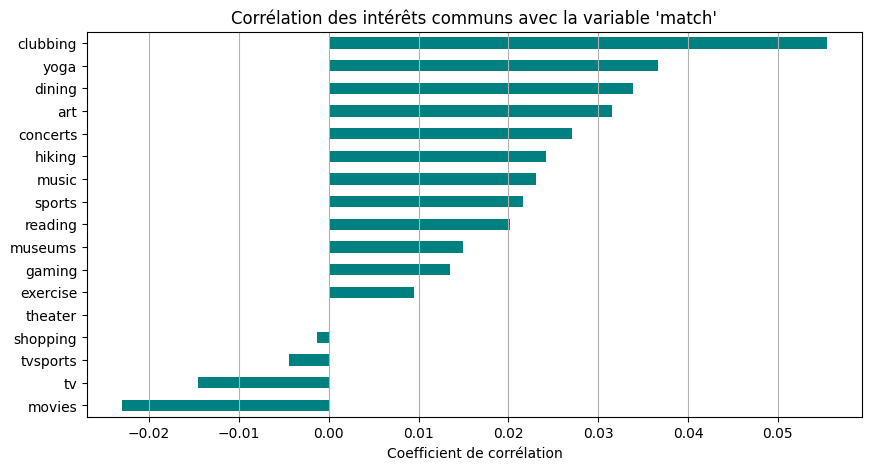

In [68]:
## ------  ANALYSE DES INTÉRÊTS COMMUNS EN FONCTION DU RÉSULTAT DU MATCH -----

# Liste des colonnes représentant des intérêts communs
interest_cols = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
                 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
                 'movies', 'concerts', 'music', 'shopping', 'yoga']

# 1. Calculer la moyenne des intérêts par classe match/non-match
interest_means = df.groupby('match')[interest_cols].mean().T  # transpose pour faciliter la lecture

print("Moyenne des intérêts communs selon le match :")
display(interest_means)

# 2. Visualisation comparative des moyennes d’intérêts communs
plt.figure(figsize=(12,6))
interest_means.plot(kind='bar', color=['red', 'green'])
plt.title("Moyenne des intérêts communs selon la classe 'match'")
plt.ylabel("Moyenne d'intérêt")
plt.xticks(rotation=45)
plt.legend(['Non match (0)', 'Match (1)'])
plt.tight_layout()
plt.show()

# 3. Calcul des corrélations de chaque intérêt avec la variable match
correlations = df[interest_cols + ['match']].corr()['match'].drop('match').sort_values()

print("\nCorrélation des intérêts communs avec la variable 'match' :")
print(correlations)

# 4. Visualiser les corrélations
plt.figure(figsize=(10,5))
correlations.plot(kind='barh', color='teal')
plt.title("Corrélation des intérêts communs avec la variable 'match'")
plt.xlabel("Coefficient de corrélation")
plt.grid(axis='x')
plt.show()


Conclusion sur les intérêts communs et leur lien avec le match :

* Les moyennes des intérêts communs montrent que, globalement, les personnes qui ont eu un match partagent légèrement plus certains intérêts (ex : dining, art, clubbing, yoga) comparé à celles sans match, même si les différences restent faibles.

* La corrélation entre chaque intérêt et la variable match est très faible, avec des valeurs proches de zéro, indiquant qu'aucun intérêt seul n'a une influence forte sur l'issue du match. Parmi ces intérêts, le clubbing, le yoga et le dining ont les corrélations légèrement les plus élevées (positives), suggérant une tendance modeste où partager ces intérêts pourrait être un facteur favorable.

* Cependant, dans l’ensemble, la faible intensité des corrélations confirme que les intérêts communs ont une influence limitée sur la probabilité de match, ce qui rejoint l’analyse précédente.

In [69]:
# ------   LA CORRÉLATION EST-ELLE PLUS FORTE POUR LES INTÉRÊTS COMMUNS QUE POUR LA MÊME ORIGINE ? ---------

# Création du DataFrame pour l’analyse de compatibilité (intérêts communs, origine et match)
df_clean_compat = df[['int_corr', 'samerace', 'match']].dropna()

# Calcul des corrélations
correlation_int_corr_match = df_clean_compat['int_corr'].corr(df_clean_compat['match'])
correlation_same_race_match = df_clean_compat['samerace'].corr(df_clean_compat['match'])

# Affichage des résultats
print(f"Corrélation entre intérêts communs et match : {correlation_int_corr_match:.3f}")
print(f"Corrélation entre même origine (samerace) et match : {correlation_same_race_match:.3f}")

Corrélation entre intérêts communs et match : 0.031
Corrélation entre même origine (samerace) et match : 0.015


In [70]:
## ------   AFFICHAGE DES JAUGES DE CORRÉLATION ---------

fig = go.Figure() # Crée la figure vide

# Jauge pour les intérêts communs
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=correlation_int_corr_match,
    domain={'x': [0, 0.45], 'y': [0.1, 1]},
    title={'text': "Corrélation Intérêts Communs", 'font': {'size': 12}},  # titre plus petit
    gauge={
        'axis': {'range': [-1, 1]},
        'bar': {'color': '#e75480'},
        'steps': [
            {'range': [-1, 0], 'color': "lightgray"},
            {'range': [0, 1], 'color': "lightpink"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': correlation_int_corr_match
        }
    }
))

# Jauge pour la même origine raciale
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=correlation_same_race_match,
    domain={'x': [0.55, 1], 'y': [0, 1]},
    title={'text': "Corrélation Même Origine Raciale", 'font': {'size': 12}},  # titre plus petit
    gauge={
        'axis': {'range': [-1, 1]},
        'bar': {'color': '#1f77b4'},
        'steps': [
            {'range': [-1, 0], 'color': "lightgray"},
            {'range': [0, 1], 'color': "lightblue"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': correlation_same_race_match
        }
    }
))

fig.update_layout(
    title={'text': "<b>Corrélations avec le fait de matcher</b>", 'x': 0.5, 'font': {'size': 20}},  # titre plus grand
    height=400,
    paper_bgcolor="white"
)

fig.show()

* Le graphique montre que la corrélation entre intérêts communs et match est de 0,031, tandis que celle entre même origine raciale et match est de 0,015.

 Les intérêts communs ont donc une influence plus marquée sur la probabilité de match que le fait de partager la même origine raciale.

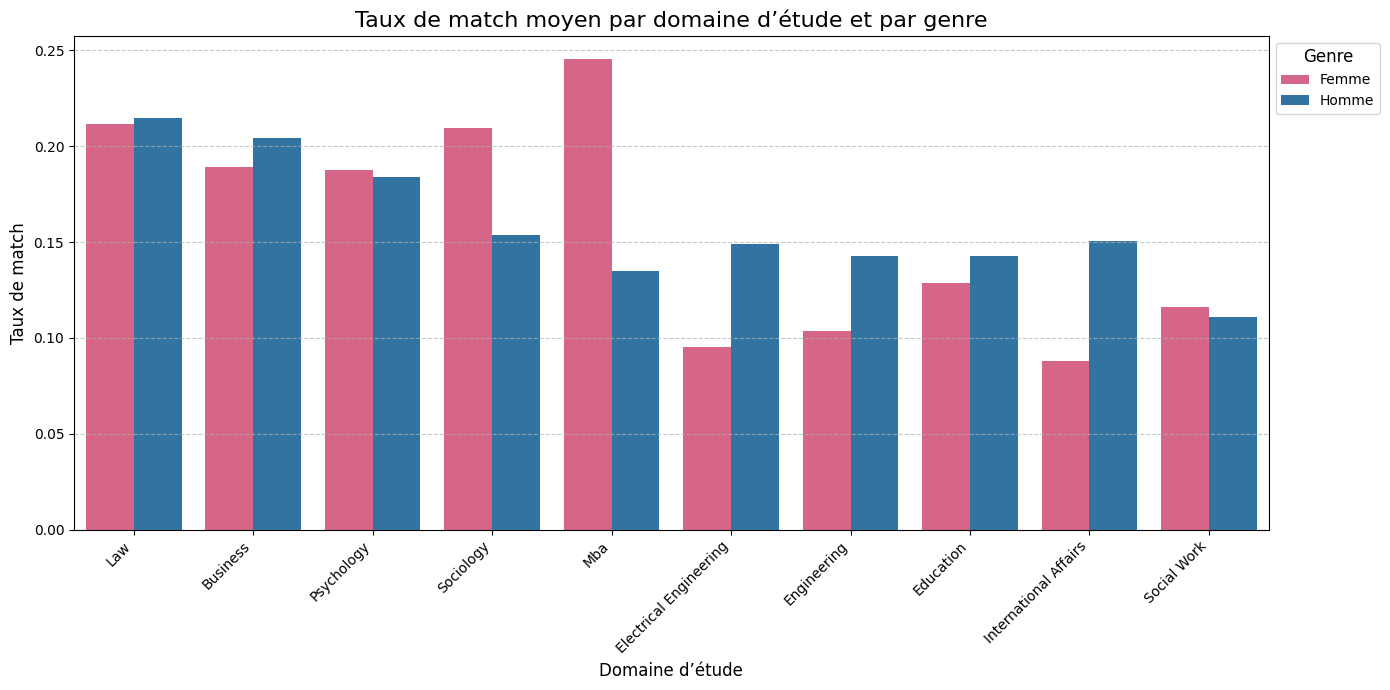

In [71]:
## ------  ÉTUDE COMPARATIVE DES TAUX DE MATCH MOYENS SELON LE DOMAINE D’ÉTUDE ET LE GENRE   ---------


# Nettoyage de la colonne 'field' pour des noms cohérents (si non fait précédemment)
df['field'] = df['field'].str.lower().str.strip().str.title()

palette_genre = {'Femme': "#e75480", 'Homme': "#1f77b4"}

top_fields = df['field'].value_counts().head(10).index
df_field_filtered = df[df['field'].isin(top_fields)].copy()

field_grouped = df_field_filtered.groupby(['gender_label', 'field'])['match'].mean().reset_index()

mean_match_by_field = df_field_filtered.groupby('field')['match'].mean().reset_index()

order_fields = mean_match_by_field.sort_values(by='match', ascending=False)['field'].tolist()

plt.figure(figsize=(14, 7))
sns.barplot(data=field_grouped,
            x='field',
            y='match',
            hue='gender_label',
            palette=palette_genre,
            order=order_fields)

plt.title("Taux de match moyen par domaine d’étude et par genre", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("Domaine d’étude", fontsize=12)
plt.ylabel("Taux de match", fontsize=12)

plt.legend(title='Genre', title_fontsize='12', fontsize='10', bbox_to_anchor=(1, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* En résumé : le taux de match moyen par domaine d'étude est très similaire
entre les genres, à l'exception de la Sociologie et du MBA, où les femmes
obtiennent un taux de match plus élevé. Globalement, les trois domaines d'étude qui enregistrent le plus haut taux de match sont le Droit, le Commerce (Business) et la Psychologie.

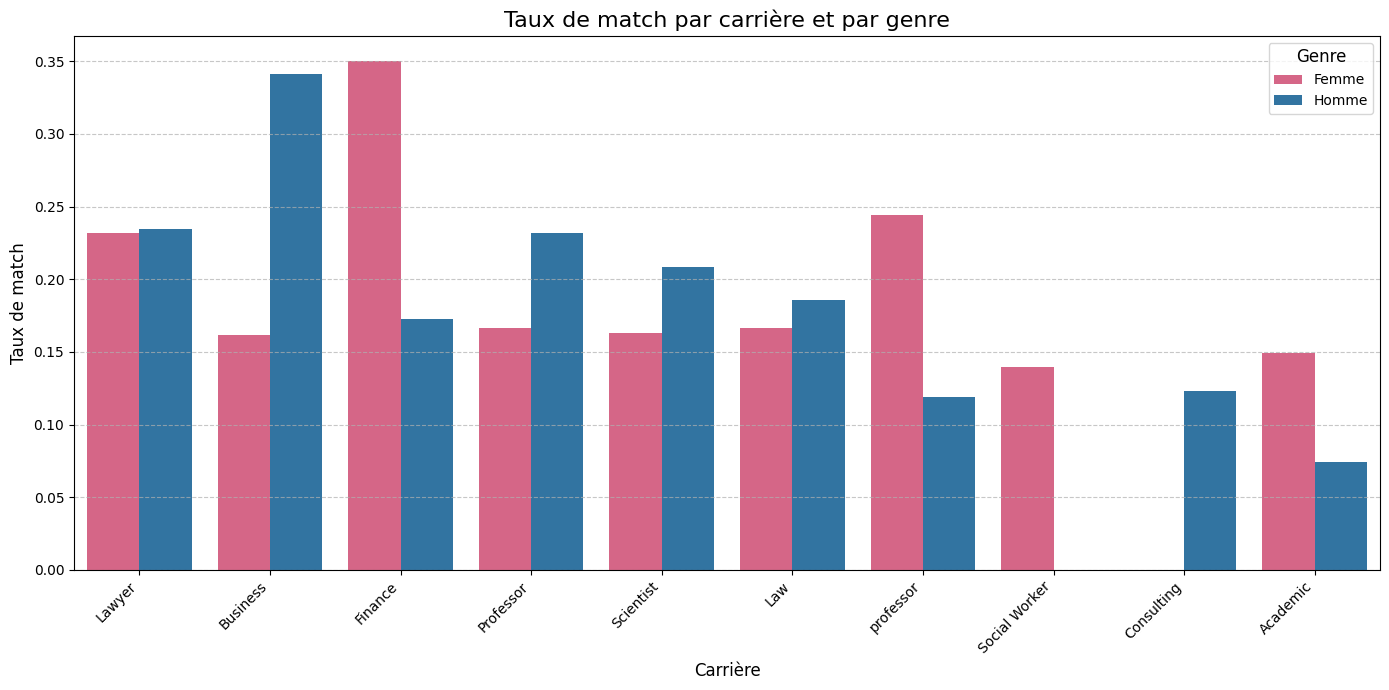

In [72]:
## ------  ÉTUDE COMPARATIVE DES TAUX DE MATCH MOYENS SELON LA CARRIÈRE ET LE GENRE   ---------


palette_genre = {'Femme': "#e75480", 'Homme': "#1f77b4"}


# Trouver les 10 carrières principales
top_careers = df['career'].value_counts().head(10).index

df_career_filtered = df[df['career'].isin(top_careers)].copy()

career_grouped = df_career_filtered.groupby(['gender_label', 'career'])['match'].mean().reset_index()

mean_match_by_career = df_career_filtered.groupby('career')['match'].mean().reset_index()

order_careers = mean_match_by_career.sort_values(by='match', ascending=False)['career'].tolist()

plt.figure(figsize=(14, 7))
sns.barplot(data=career_grouped,
            x='career',
            y='match',
            hue='gender_label',
            palette=palette_genre,
            order=order_careers)

plt.title("Taux de match par carrière et par genre", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Taux de match", fontsize=12)
plt.xlabel("Carrière", fontsize=12)
plt.legend(title='Genre', title_fontsize='12', fontsize='10')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



* Le domaine du Commerce (Business) est celui qui génère le plus de matchs chez
les hommes. Pour les femmes, c'est la Finance qui est le domaine le plus attractif en termes de matchs.

In [73]:
## ------  TAUX DE MATCH MOYEN PAR ÂGE ET PAR GENRE AVEC ÉCART-TYPE   ---------



df['match'] = pd.to_numeric(df['match'], errors='coerce')

df_clean = df.dropna(subset=['age', 'gender_label', 'match']).copy()

df_clean['age'] = df_clean['age'].astype(int)

grouped_stats = df_clean.groupby(['age', 'gender_label'])['match'].agg(['mean', 'std', 'count']).reset_index()
grouped_stats.rename(columns={'mean': 'Taux de Match Moyen', 'std': 'Ecart-type Match', 'count': 'Nombre d\'Observations'}, inplace=True)

grouped_stats['error_y_minus_bounded'] = grouped_stats.apply(
    lambda row: row['Taux de Match Moyen'] if (row['Taux de Match Moyen'] - row['Ecart-type Match']) < 0 else row['Ecart-type Match'],
    axis=1
)

min_age_for_plot = 18

palette_genre = {'Femme': "#e75480", 'Homme': "#1f77b4"}

fig = px.bar(grouped_stats,
             x='age',
             y='Taux de Match Moyen',
             color='gender_label',
             barmode='group',
             title='<b>Taux de Match Moyen par Tranche d\'Âge et par Genre avec Écart-type</b>',
             labels={'age': 'Tranche d\'âge', 'Taux de Match Moyen': 'Taux de Match Moyen'},
             template='plotly_white',
             height=600,
             width=1400,
             color_discrete_map=palette_genre
            )

# AJOUT des Barres d'Erreur
fig.update_traces(error_y=dict(
    type='data',
    array=grouped_stats['Ecart-type Match'],
   visible=True
))

fig.update_yaxes(tickformat=".0%")

if not grouped_stats.empty and 'age' in grouped_stats.columns:
    fig.update_xaxes(range=[min_age_for_plot - 0.5, grouped_stats['age'].max() + 0.5],
                     tickmode='linear', dtick=1)

fig.update_layout(legend_title_text='Genre')

fig.show()

* Ce graphique met en lumière les taux de match moyens selon l'âge et le genre, avec des barres d'erreur pour indiquer la variabilité.

Les écarts-types, souvent proches ou supérieurs aux moyennes, révèlent une forte dispersion : les taux de match varient considérablement entre individus d’un même groupe, traduisant une grande hétérogénéité dans les interactions.


In [74]:
## ------  MATRICE DE CORRÉLATION DES VARIABLES CLÉS DANS LE SPEED DATING   ---------

# Définition des colonnes clés pour la corrélation
key_columns = [
    'age',
    'int_corr',  # Corrélation d'intérêts entre les participants
    'match',     # Variable cible : indique si un "match" a eu lieu (0 ou 1)

    'attr',      # Attractivité reçue par le participant
    'sinc',      # Sincérité reçue par le participant
    'intel',     # Intelligence reçue par le participant
    'fun',       # Fun reçu par le participant
]

# Supprimer les lignes avec NaN dans les colonnes clés pour une analyse fiable.
df_key_corr = df[key_columns].dropna().copy()

# Matrice de Corrélation
correlation_matrix_key = df_key_corr.corr()

fig = px.imshow(correlation_matrix_key,
                text_auto=".2f",
                aspect="auto",
                color_continuous_scale='RdBu_r',  # Palette de couleurs (Rouge pour négatif, Bleu pour positif)
                title='Matrice de Corrélation des Variables Clés du Speed Dating'
               )

fig.update_xaxes(side="top")
fig.update_layout(
    height=900,
    width=900,
    xaxis_nticks=len(key_columns),
    yaxis_nticks=len(key_columns)
)

fig.show()

* Analyse des corrélations dans le speed dating :

Les qualités perçues sont fortement liées entre elles, avec une corrélation élevée entre sincérité et intelligence (0,66) et entre attractivité et humour (0,58), indiquant qu’elles sont souvent jugées globalement.

Toutefois, leur influence directe sur le "match" est plus modérée : humour (0,28) et attractivité (0,26) sont les facteurs les plus associés à la décision finale, suivis par intelligence (0,17) et sincérité (0,17).

L’âge (-0,04) et la correspondance d’intérêts initiaux (0,03) ont un impact quasi nul, soulignant que la décision de match repose surtout sur la perception immédiate des qualités.

In [75]:
## ------   PRÉFÉRENCES PAR GENRE : CE QUE RECHERCHENT HOMMES ET FEMMES CHEZ UN PARTENAIRE  ---------


preference_cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
preference_labels = ['Attirance', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêts Communs']

average_preferences = df.groupby('gender')[preference_cols].mean().reset_index()

gender_mapping = {0: 'Femmes', 1: 'Hommes'}
average_preferences['gender_label'] = average_preferences['gender'].map(gender_mapping)

palette = {'Femmes': '#e75480', 'Hommes': '#1f77b4'}

# Fonction couleur rgba
def hex_to_rgba(hex_color, alpha=0.5):
    hex_color = hex_color.lstrip('#')
    r = int(hex_color[0:2], 16)
    g = int(hex_color[2:4], 16)
    b = int(hex_color[4:6], 16)
    return f'rgba({r},{g},{b},{alpha})'

# Création du radar
fig_radar = go.Figure()

for gender in ['Femmes', 'Hommes']:
    values = average_preferences.loc[average_preferences['gender_label'] == gender, preference_cols].values.flatten().tolist()


    legend_name = "Par les Femmes" if gender == "Femmes" else "Par les Hommes"

    fig_radar.add_trace(go.Scatterpolar(
        r=values,
        theta=preference_labels,
        fill='toself',
        name=legend_name,
        line=dict(color=palette[gender]),
        fillcolor=hex_to_rgba(palette[gender], 0.4),
        hoverinfo='r+name'
    ))

fig_radar.update_layout(
    polar=dict(
        bgcolor="rgba(0,0,0,0.03)",
        radialaxis=dict(
            visible=True,
            range=[0, max(average_preferences[preference_cols].max())*1.1],
            gridcolor="rgba(0,0,0,0.3)",
            linecolor="black",
            tickfont=dict(size=11, color="black")
        ),
        angularaxis=dict(
            gridcolor="rgba(0,0,0,0.3)",
            linecolor="black",
            tickfont=dict(size=12, color="black")
        )
    ),
    showlegend=True,
    legend=dict(
        font=dict(size=12),
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="black",
        borderwidth=1,
        x=0.85,
        y=1
    ),
    title=dict(
        text="<b>Qualités recherchées (Hommes vs Femmes)</b>",
        x=0.5,
        font=dict(size=18)
    ),
    height=600,
    width=700,
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="white"
)

fig_radar.show()

* Les hommes accordent plus d’importance à l’attractivité physique chez un      partenaire (26,9), tandis que les femmes valorisent un peu plus des qualités comme l’intelligence (21,0), la sincérité (18,3), l’ambition (12,8) et le partage d’intérêts (12,7).

* L’ambition est un critère modérément important, davantage valorisé par les femmes (12,8) que par les hommes (8,6), mais globalement moins prioritaire que d’autres qualités comme l’intelligence ou l’attractivité.

* L’humour est un facteur apprécié de manière similaire par les deux genres (17,8 chez les hommes, 17,1 chez les femmes). Ces différences traduisent des priorités légèrement distinctes dans ce que recherchent hommes et femmes lors du speed dating.


In [76]:
## ----   AUTO-EVALUATION VS EVALUATION PAR LES PARTENAIRES  ----


# Suppression lignes contenant des valeurs manquantes dans les colonnes clés > assurer des moyennes correctes et un graphique cohérent
df_clean_attract = df.dropna(subset=['attr', 'attr_o', 'gender_label']).copy()


mean_attract_scores = df_clean_attract.groupby('gender_label').agg(
    mean_self_attr=('attr', 'mean'),
    mean_other_attr=('attr_o', 'mean')
).reset_index()


mean_attract_melted = mean_attract_scores.melt(
    id_vars='gender_label',
    var_name='Type d\'Évaluation',
    value_name='Score Moyen d\'Attractivité'
)

mean_attract_melted['Type d\'Évaluation'] = mean_attract_melted['Type d\'Évaluation'].map(
    {'mean_self_attr': 'Auto-évaluation', 'mean_other_attr': 'Évaluation par l\'autre'}
)

palette_genre = {'Femme': "#e75480", 'Homme': "#1f77b4"}
# Gérer le cas "Non spécifié" si nécessaire
if 'Non spécifié' in mean_attract_melted['gender_label'].unique():
    palette_genre['Non spécifié'] = 'grey'



# MODIFICATION ICI : 'color' est maintenant 'gender_label' et 'x' est 'Type d'Évaluation'
fig_bar = px.bar(mean_attract_melted,
                 x='Type d\'Évaluation',
                 y='Score Moyen d\'Attractivité',
                 color='gender_label',
                 barmode='group',
                 title='Attractivité Moyenne : Auto-évaluation vs. Évaluation par les Partenaires',
                 labels={'gender_label': 'Genre du Participant',
                         'Score Moyen d\'Attractivité': 'Score Moyen (1-10)',
                         'Type d\'Évaluation': 'Type d\'Évaluation'},
                 template='plotly_white',
                 height=500, width=700,
                 color_discrete_map=palette_genre
                )

fig_bar.update_yaxes(range=[0, mean_attract_melted['Score Moyen d\'Attractivité'].max() * 1.1])

fig_bar.update_layout(legend_title_text='Genre du Participant')

fig_bar.show()

L'analyse révèle des dynamiques contrastées de l'attractivité perçue entre les genres :

* Femmes : Elles s'auto-évaluent (5.92) plus bas que les hommes ne les évaluent (6.46), indiquant une légère sous-estimation de soi et une perception positive par les hommes.

* Hommes : Ils s'auto-évaluent (6.46) plus haut que les femmes ne les évaluent (5.92), suggérant une sur-estimation de soi et une perception moins favorable par les femmes.

* Perception Inter-genres : Les femmes sont, en moyenne, perçues comme plus attractives par les hommes (6.46) que les hommes par les femmes (5.92), soulignant une asymétrie dans l'évaluation de l'attractivité.


In [77]:
## ---   TAUX DE MATCH GENERAL : FEMMES VS HOMMES   ----


df = df.copy()
df['match'] = pd.to_numeric(df['match'], errors='coerce')
df['gender_label'] = df['gender'].map({0: 'Femme', 1: 'Homme'})

df_rate_base = df.dropna(subset=['match', 'gender_label'])

df_rate = (
    df_rate_base
    .groupby('gender_label', as_index=False)
    .agg(match_rate=('match', 'mean'))
)

palette_genre = {'Femme': "#e75480", 'Homme': "#1f77b4"}


fig = px.bar(
    df_rate,
    x='gender_label',
    y='match_rate',
    color='gender_label',
    title="<b>Taux de match général par genre</b>",
    labels={'gender_label': 'Genre', 'match_rate': 'Taux de match'},
    template='plotly_white',
    text='match_rate',
    color_discrete_map=palette_genre
)

fig.update_traces(
    texttemplate='%{y:.1%}',
    textposition='outside'
)

fig.update_yaxes(tickformat=".0%", rangemode='tozero', title_text="Taux de match")
fig.update_xaxes(title_text="Genre")

fig.update_layout(showlegend=False)

fig.show()

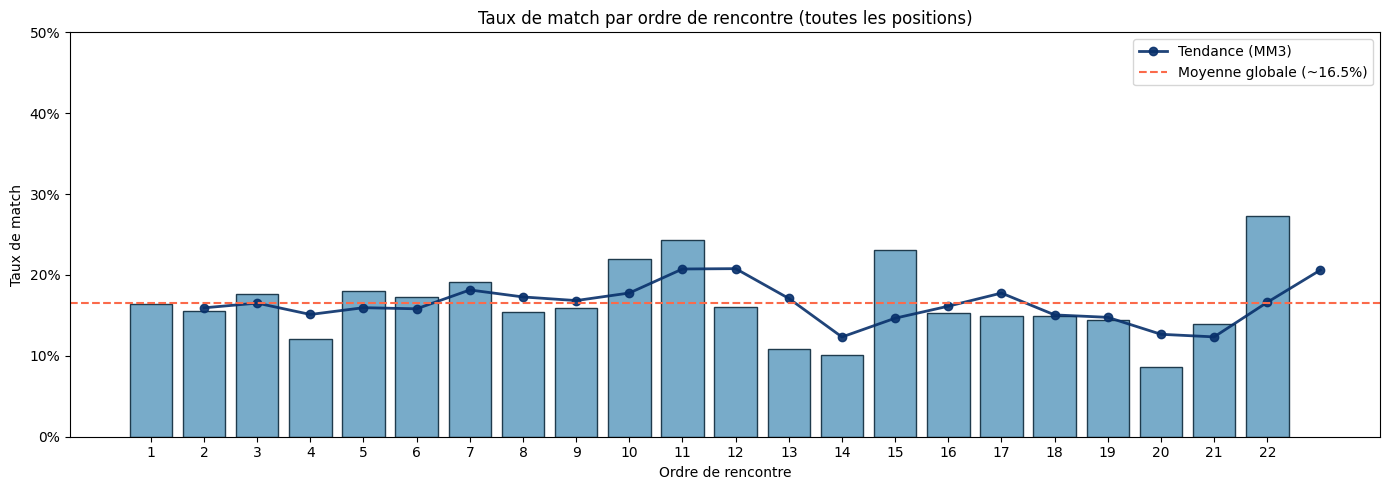

In [78]:
##  ----   TAUX DE MATCH PAR ORDRE DE RENCONTRE   ----


df_pos = (
    df[['position', 'match']]
    .dropna()
    .assign(position=lambda d: d['position'].astype(int))
    .groupby('position')
    .agg(match_rate=('match', 'mean'), n=('match', 'size'))
    .reset_index()
    .sort_values('position')
)


window = 3  # taille de la moyenne mobile (3 = lissage léger)


plt.figure(figsize=(14, 5))
sns.barplot(data=df_pos, x='position', y='match_rate', color='#6BAED6', edgecolor='#1F3B4D')

# Courbe de tendance (moyenne mobile centrée)
trend = df_pos['match_rate'].rolling(window=window, center=True, min_periods=1).mean()
plt.plot(df_pos['position'], trend, marker='o', linewidth=2, alpha=0.9, label=f'Tendance (MM{window})', color='#08306B')

# Ligne de moyenne globale
overall = df_pos['match_rate'].mean()
plt.axhline(overall, linestyle='--', linewidth=1.5, color='#FB6A4A', label=f'Moyenne globale (~{overall:.1%})')


plt.title("Taux de match par ordre de rencontre (toutes les positions)")
plt.xlabel("Ordre de rencontre")
plt.ylabel("Taux de match")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.ylim(0, max(0.5, df_pos['match_rate'].max() * 1.15))
plt.legend()
plt.tight_layout()
plt.show()

* Le taux de match reste globalement faible et relativement stable, mais on
observe de légères hausses au milieu (environ 23% / 24%) et surtout en fin de session (28%), où les chances de match deviennent plus élevées que la moyenne.
Cela pourrait s’expliquer par une fatigue décisionnelle ou un effet de fin de session, rendant les participants plus enclins à matcher à la fin

In [79]:
###  POUR LA CERTIFICATION LE NOTEBOOK S'ARRETE ICI.







###  LA SUITE EST LE MACHINE LEARNING EN BONUS /   NE SERA PAS PRESENTÉ POUR CERTIF  !!!!!








In [80]:
## ----------  TEST 1 : MODÈLE DE CLASSIFICATION AVEC RANDOM FOREST + SMOTE POUR CORRIGER LE DÉSÉQUILIBRE CAR SEULEMENT 1380 MATCH SUR 8 380 OBSERVATIONS  --------

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Sélection des variables explicatives pertinentes + variable cible
features = [
    'gender', 'age', 'samerace', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
    'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',
    'shar_o', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
    'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
    'concerts', 'music', 'shopping', 'yoga'
]

X = df[features]
y = df['match']

# Séparation des variables catégorielles et numériques
cat_features = ['gender', 'samerace']
num_features = [col for col in features if col not in cat_features]

# Prétraitement : imputations + encodage des catégories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features),
    ]
)

# SMOTE : sur-échantillonnage de la classe minoritaire (match = 1)
# Objectif : corriger le déséquilibre entre les classes
# - Génère des exemples synthétiques plutôt que de dupliquer
# - Améliore le rappel (recall) sur la classe minoritaire
smote = SMOTE(random_state=42)

# RandomForest avec pondération automatique des classes
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')

# Pipeline complet : prétraitement → suréchantillonnage → classification
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])

# Séparation entraînement / test avec stratification pour conserver le déséquilibre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Évaluation sur le jeu de test
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1400
           1       0.42      0.37      0.40       276

    accuracy                           0.81      1676
   macro avg       0.65      0.64      0.64      1676
weighted avg       0.80      0.81      0.81      1676



In [81]:
## ----------  TEST 2 : MODÈLE DE CLASSIFICATION AVEC RANDOM FOREST + ADASYN POUR CORRIGER LE DÉSÉQUILIBRE DE CLASSE ET PRÉTRAITEMENT AUTOMATIQUE --------



from imblearn.over_sampling import ADASYN


target = 'match'

# Exclusion des colonnes non informatives ou directement liées à l'identité ou à la cible
excluded_cols = ['iid', 'id', 'idg', 'partner', 'pid', target]


X = df.drop(columns=excluded_cols)
y = df[target]


categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Prétraitement des colonnes catégorielles : imputation + encodage OneHot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Prétraitement des colonnes numériques : imputation par la médiane
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Assembleur de transformations pour les données numériques et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Pipeline complet : prétraitement → sur-échantillonnage (ADASYN) → modèle RandomForest
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', ADASYN(random_state=42)),  # Génère des exemples synthétiques pour la classe minoritaire
    ('classifier', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
])

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du pipeline sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = pipeline.predict(X_test)

# Affichage des métriques de classification (précision, rappel, F1)
print(classification_report(y_test, y_pred))



Categorical columns: ['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income', 'career', 'gender_label']
Numerical columns: ['gender', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'am

In [82]:
## ------------- TEST 3 - ÉVALUATION AVANCÉE AVEC AJUSTEMENT DU SEUIL DE CLASSIFICATION -----------


# Objectif : ajuster le seuil de décision pour mieux détecter la classe minoritaire (match = 1).
# Cela permet d'améliorer le rappel (recall) au détriment éventuel de la précision.

# Obtenir les probabilités prédites pour la classe positive (classe 1)
# predict_proba renvoie un tableau de forme (n_samples, n_classes)
# [:, 1] sélectionne la probabilité associée à la classe 1
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Définir un seuil personnalisé pour la classification
# Par défaut, le seuil est 0.5 : ici on le baisse à 0.3 pour être plus sensible à la classe 1
threshold = 0.3

# Convertir les probabilités en prédictions binaires selon ce seuil
# Si probabilité >= 0.3, prédire classe 1, sinon classe 0
y_pred_adj = (y_proba >= threshold).astype(int)

# Importer la fonction pour générer le rapport de classification
from sklearn.metrics import classification_report

# Afficher les métriques de performance (precision, recall, f1-score, support)
# pour les prédictions ajustées avec le nouveau seuil
print(classification_report(y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1389
           1       0.63      0.89      0.74       287

    accuracy                           0.89      1676
   macro avg       0.80      0.89      0.83      1676
weighted avg       0.92      0.89      0.90      1676



Meilleur seuil: 0.37 avec un F1-score de 0.795
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1389
           1       0.77      0.83      0.80       287

    accuracy                           0.93      1676
   macro avg       0.87      0.89      0.88      1676
weighted avg       0.93      0.93      0.93      1676



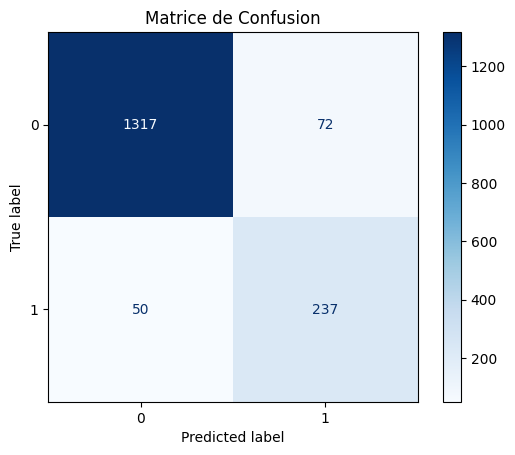

In [83]:
## ------------- TEST FINAL – OPTIMISATION DU SEUIL DE CLASSIFICATION ET VISUALISATION  -----------


from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Calcul des probabilités de la classe positive (match = 1)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Définir une grille de seuils à tester entre 0 et 1 avec un pas de 0.01
thresholds = np.arange(0, 1.01, 0.01)

# Initialisation des variables pour suivre le meilleur seuil et son F1-score associé
best_threshold = 0.5
best_f1 = 0

# Boucle sur chaque seuil pour calculer les prédictions et évaluer le F1-score
for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    score = f1_score(y_test, y_pred)
    if score > best_f1:
        best_f1 = score
        best_threshold = t  # On retient le seuil qui donne le meilleur F1-score

# Affichage du meilleur seuil trouvé et de son F1-score
print(f"Meilleur seuil: {best_threshold:.2f} avec un F1-score de {best_f1:.3f}")

# Refaire les prédictions finales avec le seuil optimal
y_pred_opt = (y_proba >= best_threshold).astype(int)

# Affichage du rapport de classification (précision, rappel, F1-score)
print(classification_report(y_test, y_pred_opt))

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_opt)

# Affichage graphique de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()


Conclusion :

Le modèle Random Forest entraîné avec un prétraitement adapté et un sur-échantillonnage via ADASYN a permis d’atteindre une très bonne performance globale sur le jeu de test. En optimisant le seuil de classification à 0.37, nous obtenons un F1-score de 0.795, ce qui reflète un bon équilibre entre précision et rappel pour la détection des matchs (classe minoritaire).



* Précision (precision) : ici à 0.77 pour la classe positive, elle mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives. Autrement dit, quand le modèle prédit un match, il a 77% de chances d’avoir raison. Cela limite les faux positifs (faux alarms).

* Rappel (recall) : à 0.83, il indique la capacité du modèle à détecter la majorité des vrais matchs. Sur tous les vrais matchs, 83% sont bien identifiés. Un rappel élevé est important ici pour ne pas rater de matchs réels.

* F1-score : c’est la moyenne harmonique entre précision et rappel. À 0.795, il résume bien la performance globale sur la classe minoritaire, en tenant compte à la fois des faux positifs et des faux négatifs.

* Exactitude (accuracy) : 93%, c’est la proportion globale des bonnes prédictions, toutes classes confondues. C’est un bon indicateur de performance générale, mais à lui seul il peut être trompeur en cas de déséquilibre fort des classes.



Plus précisément, la précision élevée combinée à un rappel robuste pour la classe positive montre que le modèle identifie correctement une majorité de vrais matchs tout en limitant les erreurs de fausse détection. La précision et le rappel élevés pour la classe négative confirment aussi la fiabilité générale du modèle.

Enfin, l’ajustement du seuil de classification permet d’adapter la sensibilité du modèle aux besoins métier, en privilégiant la détection des matchs (classe minoritaire) plutôt que la simple prédiction majoritaire, ce qui est essentiel pour la pertinence opérationnelle du système.

Pour info si question :

🟦 SMOTE (Synthetic Minority Over-sampling Technique)
Principe : crée des exemples synthétiques en interpolant entre un point minoritaire et ses voisins proches.

Approche : uniforme (tous les points minoritaires sont traités pareil).

Avantages : simple, rapide, efficace sur des données propres.

Inconvénients : peut générer des points inutiles dans des zones déjà bien apprises ; risque d'accentuer le chevauchement entre classes.

🟨 ADASYN (Adaptive Synthetic Sampling)
Principe : extension de SMOTE qui génère plus d’exemples là où la classe minoritaire est difficile à apprendre.

Approche : adaptative (cible les points minoritaires mal entourés).

Avantages : meilleure gestion des zones complexes ou bruitées ; améliore la capacité du modèle à distinguer les classes difficiles.

Inconvénients : peut amplifier le bruit ; moins stable sur des datasets très déséquilibrés ou peu denses.

📌 En résumé :
Critère	SMOTE	ADASYN
Stratégie	Uniforme	Adaptative
Où sont générés les points	Partout	Zones difficiles (proches du bruit)
Simplicité	✅ Simple	⚠️ Un peu plus complexe
Risque de bruit	Faible	Plus élevé
Idéal pour	Données propres et équilibrables	Données complexes ou bruitées